In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import numpy as np

In [6]:
! pip3 install pandas
! pip3 install xlrd

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)


In [7]:
df = pd.read_excel('windprofiles.xls')

In [11]:
df.head()

,time (hour),u10 (m/s),u40 (m/s),u60 (m/s),u80 (m/s),u100 (m/s),u116 (Um/s),u160 (m/s),dir10,dir60,dir100,Unnamed: 11,Unnamed: 12,time decimal hours,Unnamed: 14,Unnamed: 15
0,00:00:00,4.25636,7.18414,8.56345,9.75567,10.9667,12.1298,13.8083,110.616,131.652,141.809,NaN,NaN,0.000000,NaN,midnight
1,00:10:00,4.54607,7.40763,8.62832,9.91782,11.2024,12.2694,14.1229,114.551,133.624,142.565,NaN,NaN,0.166667,NaN,NaN
2,00:20:00,4.48597,6.90398,8.06806,9.54922,10.9354,12.0622,14.1083,114.343,135.404,142.934,NaN,NaN,0.333333,NaN,NaN
3,00:30:00,4.29970,6.78310,8.18141,9.64565,10.9862,12.0684,13.8210,114.325,135.272,143.951,NaN,NaN,0.500000,NaN,NaN
4,00:40:00,4.32460,6.78405,8.07585,9.48084,10.7186,11.7632,13.6223,112.893,133.654,141.589,NaN,NaN,0.666667,NaN,NaN


In [13]:
#remove unwanted columns
delete = [11, 12, 14, 15]
for col in delete:
    string = 'Unnamed: {}'.format(col)
    del df[string]
    

In [14]:
df.head()

,time (hour),u10 (m/s),u40 (m/s),u60 (m/s),u80 (m/s),u100 (m/s),u116 (Um/s),u160 (m/s),dir10,dir60,dir100,time decimal hours
0,00:00:00,4.25636,7.18414,8.56345,9.75567,10.9667,12.1298,13.8083,110.616,131.652,141.809,0.000000
1,00:10:00,4.54607,7.40763,8.62832,9.91782,11.2024,12.2694,14.1229,114.551,133.624,142.565,0.166667
2,00:20:00,4.48597,6.90398,8.06806,9.54922,10.9354,12.0622,14.1083,114.343,135.404,142.934,0.333333
3,00:30:00,4.29970,6.78310,8.18141,9.64565,10.9862,12.0684,13.8210,114.325,135.272,143.951,0.500000
4,00:40:00,4.32460,6.78405,8.07585,9.48084,10.7186,11.7632,13.6223,112.893,133.654,141.589,0.666667


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time (hour)         109 non-null    object 
 1   u10 (m/s)           109 non-null    float64
 2   u40 (m/s)           109 non-null    float64
 3   u60 (m/s)           109 non-null    float64
 4   u80 (m/s)           109 non-null    float64
 5   u100 (m/s)          109 non-null    float64
 6   u116 (Um/s)         109 non-null    float64
 7   u160 (m/s)          109 non-null    float64
 8   dir10               109 non-null    float64
 9   dir60               109 non-null    float64
 10  dir100              109 non-null    float64
 11  time decimal hours  109 non-null    float64
dtypes: float64(11), object(1)
memory usage: 10.3+ KB


In [26]:
df['time (hour)'].loc[2]

datetime.time(0, 20)

In [30]:
K=0.4

In [33]:
def neutral_speed (u, z, z0):
    return (u/K)*np.log(z/z0)

In [44]:
def speed(u,z,zo,st):
    return (u/K)*np.log(z/z0)-st

In [34]:
def fric(z, z0, u):
    return (u*K)/(np.log(z/z0))

In [45]:
def st(U, z, z0, u_):
    return neutral_speed(u_, z, z0)-U

In [35]:
fric(10, 0.1, 20)

1.737177927613007

In [36]:
Z0 = 0.03

In [38]:
df.head()

,time (hour),u10 (m/s),u40 (m/s),u60 (m/s),u80 (m/s),u100 (m/s),u116 (Um/s),u160 (m/s),dir10,dir60,dir100,time decimal hours
0,00:00:00,4.25636,7.18414,8.56345,9.75567,10.9667,12.1298,13.8083,110.616,131.652,141.809,0.000000
1,00:10:00,4.54607,7.40763,8.62832,9.91782,11.2024,12.2694,14.1229,114.551,133.624,142.565,0.166667
2,00:20:00,4.48597,6.90398,8.06806,9.54922,10.9354,12.0622,14.1083,114.343,135.404,142.934,0.333333
3,00:30:00,4.29970,6.78310,8.18141,9.64565,10.9862,12.0684,13.8210,114.325,135.272,143.951,0.500000
4,00:40:00,4.32460,6.78405,8.07585,9.48084,10.7186,11.7632,13.6223,112.893,133.654,141.589,0.666667


In [39]:
df['u* variation 10m'] = df['u10 (m/s)'].map(lambda x: fric(10, Z0, x))

In [40]:
df.head()

,time (hour),u10 (m/s),u40 (m/s),u60 (m/s),u80 (m/s),u100 (m/s),u116 (Um/s),u160 (m/s),dir10,dir60,dir100,time decimal hours,u* variation 10m
0,00:00:00,4.25636,7.18414,8.56345,9.75567,10.9667,12.1298,13.8083,110.616,131.652,141.809,0.000000,0.293080
1,00:10:00,4.54607,7.40763,8.62832,9.91782,11.2024,12.2694,14.1229,114.551,133.624,142.565,0.166667,0.313029
2,00:20:00,4.48597,6.90398,8.06806,9.54922,10.9354,12.0622,14.1083,114.343,135.404,142.934,0.333333,0.308890
3,00:30:00,4.29970,6.78310,8.18141,9.64565,10.9862,12.0684,13.8210,114.325,135.272,143.951,0.500000,0.296064
4,00:40:00,4.32460,6.78405,8.07585,9.48084,10.7186,11.7632,13.6223,112.893,133.654,141.589,0.666667,0.297779


Text(0, 0.5, 'u*')

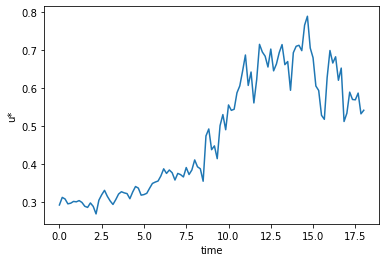

In [43]:
plt.plot(df['time decimal hours'], df['u* variation 10m'])
plt.xlabel('time')
plt.ylabel('u*')

In [46]:
df['st 60m'] = st(df['u60 (m/s)'],60, Z0, df['u* variation 10m'])

Text(0.5, 1.0, 'stability correction factor with respect to day time')

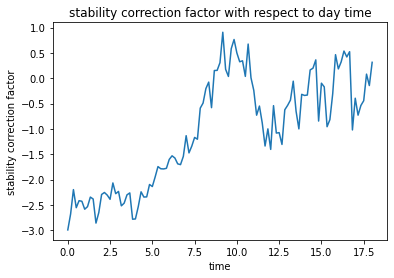

In [47]:
plt.plot(df['time decimal hours'], df['st 60m'])
plt.xlabel('time')
plt.ylabel('stability correction factor')
plt.title('stability correction factor with respect to day time')

In [50]:
df.iloc[:, 8]

0      110.616
1      114.551
2      114.343
3      114.325
4      112.893
        ...   
104    130.701
105    128.364
106    126.976
107    124.838
108    118.788
Name: dir10, Length: 109, dtype: float64

In [62]:
df.columns[8]

'dir10'

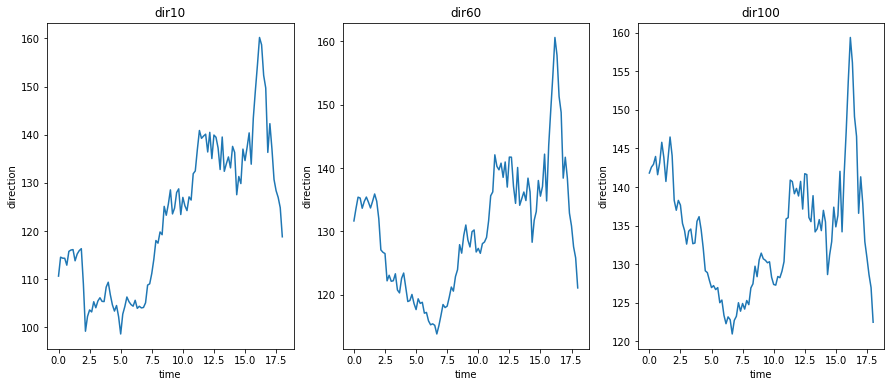

In [65]:
fig, axs = plt.subplots(1,3, figsize=(15,6))
axs = axs.ravel()

for i in range(0,3):
    axs[i].plot(df.loc[:, 'time decimal hours'], df.iloc[:, i+8])
    axs[i].set_xlabel('time')
    axs[i].set_ylabel('direction')
    axs[i].set_title(df.columns[i+8])
plt.show()

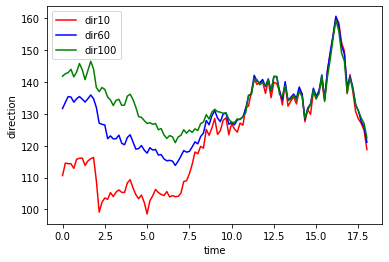

In [69]:
fig, axs = plt.subplots(1,1)
colours = ['red', 'blue', 'green']
for i, colour in zip(range(0,3), colours):
    axs.plot(df.loc[:, 'time decimal hours'], df.iloc[:, i+8], color=colour,
            label=df.columns[i+8])

axs.set_xlabel('time')
axs.set_ylabel('direction')
axs.legend(loc='upper left')
axs.title('Showing the daily variation of wind direction')
plt.show()

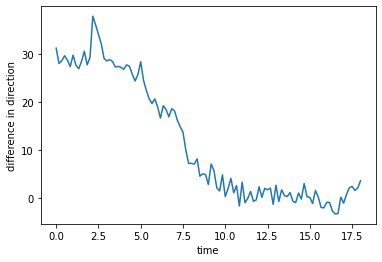

In [78]:
df['dif 100 10 dir'] = df.loc[:,'dir100']-df.loc[:,'dir10']
plt.plot(df['time decimal hours'], df['dif 100 10 dir'])
plt.xlabel('time')
plt.ylabel('difference in direction')
plt.show()

In [75]:
def st(x1, x2):
    return neutral_speed(x2, 60, Z0)-x1

In [79]:
df['el 10m'] = df.loc[:,'u10 (m/s)'].map(lambda x: x**3)


In [82]:
del df['el u160']
df['el 160m'] = df.loc[:, 'u160 (m/s)'].map(lambda x: x**3)

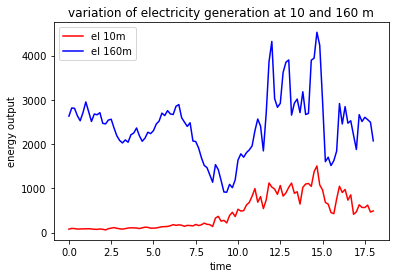

In [91]:
fig, axs = plt.subplots(1,1)
colours = ['red', 'blue']
columns = ['el 10m', 'el 160m']
for column, colour in zip(columns, colours):
    axs.plot(df.loc[:, 'time decimal hours'], df.loc[:, column], color=colour,
            label=column)

axs.set_xlabel('time')
axs.set_ylabel('energy output')
axs.legend(loc='upper left')
axs.set_title('variation of electricity generation at 10 and 160 m')
plt.show()

In [84]:
for i in df.loc[:, 'el 10m':'el 160m']:
    print(i)
    print(data)

ValueError: too many values to unpack (expected 2)

In [93]:
maxdif = np.abs(df['el 10m']-df['el 160m']).max()
print('The maximum difference in energy generation is {} Watts'.format(maxdif))

The maximum difference in energy generation is 3291.7695027056484 Watts
